Three animations to show how the waves travel more easily.

1. Wave spread in a uniform resilience
2. Wave spread from a lower into higher resilience 
3. Wave spread into a buffer zone (two animations)

NOTE: The ipython magic %matplotlib notebook that is required to get this to work as a notebook may not work depending on your install. The file Animations.py is identical to this file, except for the file names that it saves under, and the fact that that file additionally saves still frames at the end of each animation.

In [ ]:
import spatialfunctions as sf
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
%matplotlib notebook

In [21]:
# Setup animation
# initialization function: plot the background of each frame
def init():
    bl.set_data([],[])
    return bl

# animation function.  This is called sequentially
def animate(i,t):
    bl.set_data(xr/1000, t[i,N+2])
    return bl

In [22]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens')
cdiscrete = cmap(np.linspace(0, 1, 10))
c0 = 'k'
c1 = cdiscrete[-1]
# Other color
c2 = plt.cm.get_cmap('PiYG')(0.1)

# Figsize consistent
figsize = (4,4)

# Animation things
interval = 10
fps = 10

/var/folders/l1/prbyqvgx4mg745chvp4d8x3r0000gn/T/ipykernel_21605/3364838415.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')
/var/folders/l1/prbyqvgx4mg745chvp4d8x3r0000gn/T/ipykernel_21605/3364838415.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c2 = plt.cm.get_cmap('PiYG')(0.1)


In [17]:
# Set params
s = 0.99
N = 60
c = 1300
al= 0.001
p = 250

# Set up grid to be large enough given the dispersal kernel
xrexp = 19; dx=16;
xr = np.arange(-2**xrexp,2**xrexp+dx,step=dx)

# Get fopt for these params
fopt = sf.getfopt(p,c)

# Get initial setup
x0 = sf.get_x0even(xrexp,dx,fopt,c,s,N)

# Simulation 1 - Spread in uniform resilience

In [18]:
# Simulate

# Number of steps
nt1 = 200

# Iterate
wave1 = sf.iterate(xr,nt1,fopt,x0,al,c,s,N)

In [19]:
fig, ax = plt.subplots(figsize=figsize,tight_layout=True)

# Limits
ax.set_xlim(-5,200)
ax.set_ylim(0,1)
ax.set_xlabel('Space (km)')
ax.set_ylabel('Fraction of infested trees')

# Make empty lines
bl, = ax.plot([],c=c1)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(wave1,),
                           frames=nt1, interval=interval, blit=True)

# Save the animation
#anim.save('animations/travellingwave_p250.mp4',animation.FFMpegWriter(fps=fps))

plt.show()
#plt.savefig('animations/SupportingVideoA1_still.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>

# Simulation 2 - Spread into higher resilience

In [27]:
# Time
nt2 = 200

# Set up three regions for wave
p1 = 200
p2 = 300
p3 = 400
parr = np.ones([len(xr)])*p1
# Width of first and intermediate in km
w = 75
parr[int((2**xrexp+w*1000)/dx):int((2**xrexp+2*w*1000)/dx)] = p2
parr[int((2**xrexp+2*w*1000)/dx)::] = p3

# Get the list of functions. Do this as a dictionary where the keys are the p values
fopt_list = {}
for pp in [p1,p2,p3]:
    fopt_list[pp] = sf.getfopt(pp,c)

# Now define f in the parr case. This assumes both m and parr are arrays!
def farr(m,parr):
    return np.array([fopt_list[pp](mm) for pp,mm in zip(parr,m)])

In [28]:
# Iterate
wave2 = sf.iterate(xr,nt2,farr,x0,al,c,s,N,parr=parr)

<IPython.core.display.Javascript object>


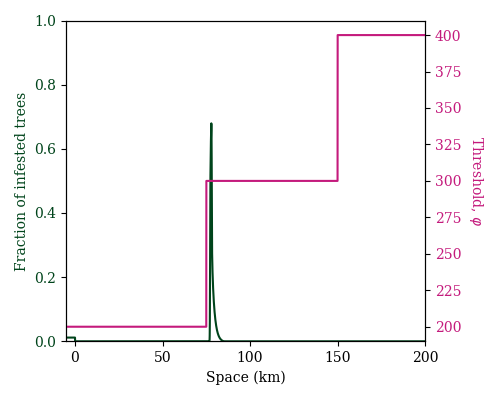

In [38]:
fig, ax = plt.subplots(figsize=(figsize[0]+1,figsize[0]),tight_layout=True)

ax.set_xlim(-5,200)
ax.set_ylim(0,1)
ax.set_xlabel('Space (km)')
ax.set_ylabel('Fraction of infested trees',c=c1)
for tick in ax.get_yticklabels():
    tick.set_color(c1)

# Make empty lines
bl, = ax.plot([],c=c1)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(wave2,),
                           frames=nt2, interval=interval, blit=True)

# Make a map of resilience
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel(r'Threshold, $\varphi$',rotation=270,color=c2,va='bottom')
ax2.plot(xr/1000, parr, color=c2)
for tick in ax2.get_yticklabels():
    tick.set_color(c2)

# Save the animation
anim.save('animations/travellingwave_pvaries.mp4',animation.FFMpegWriter(fps=fps))

plt.show()

# Simulation 3 - Wave spread into buffer zone

In [51]:
# In this simulation show two cases, one where the wave propogates and one where it doesn't
# Length
nt3 = 100
# Get phi for the buffers
pb = 500
# Buffer widths
widths = [2,4]

# Get the list of functions. Do this as a dictionary where the keys are the g values
fopt_list3 = {}
for pp in [p,pb]:
    fopt_list3[pp] = sf.getfopt(pp,c)
    
# Now define f in the garr case. This assumes both m and parr are arrays!
def fbarr(m,parr):
    return np.array([fopt_list3[pp](mm) for pp,mm in zip(parr,m)])

# Save results to array
wave3 = np.zeros([len(widths),nt3+1,N+3,len(xr)])

# Save pbarr with all widths
pbarr = np.ones([len(widths),len(xr)])*p

for i,w in enumerate(widths):
    # Buffer zone
    pbarr[i,int(2**xrexp/dx):int((2**xrexp+w*1000)/dx)] = pb

    # Iterate and save
    wave3[i] = sf.iterate(xr,nt3,fbarr,x0,al,c,s,N,parr=pbarr[i])

<IPython.core.display.Javascript object>


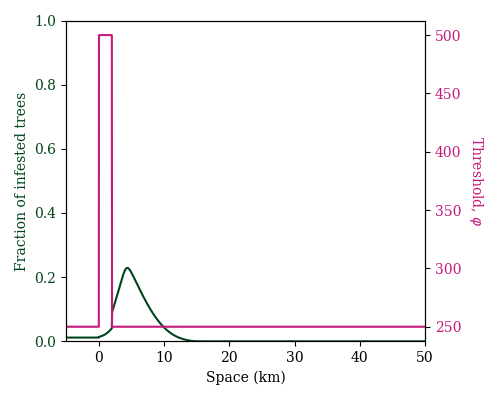

In [52]:
fig, ax = plt.subplots(figsize=(figsize[0]+1,figsize[0]),tight_layout=True)

ax.set_xlim(-5,50)
ax.set_ylim(0,1)
ax.set_xlabel('Space (km)')
ax.set_ylabel('Fraction of infested trees',c=c1)
for tick in ax.get_yticklabels():
    tick.set_color(c1)

# Make empty lines
bl, = ax.plot([],c=c1)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(wave3[0],),
                           frames=nt3, interval=interval, blit=True)

# Make a map of resilience
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel(r'Threshold, $\varphi$',rotation=270,color=c2,va='bottom')
ax2.plot(xr/1000, pbarr[0], color=c2)
for tick in ax2.get_yticklabels():
    tick.set_color(c2)

# Save the animation
anim.save('animations/travellingwave_pbufferthrough.mp4',animation.FFMpegWriter(fps=fps))

plt.show()

<IPython.core.display.Javascript object>


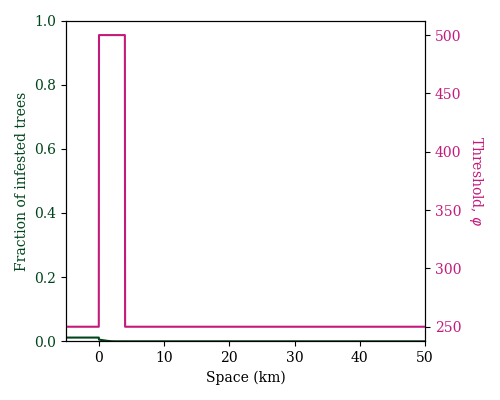

In [53]:
fig, ax = plt.subplots(figsize=(figsize[0]+1,figsize[0]),tight_layout=True)

ax.set_xlim(-5,50)
ax.set_ylim(0,1)
ax.set_xlabel('Space (km)')
ax.set_ylabel('Fraction of infested trees',c=c1)
for tick in ax.get_yticklabels():
    tick.set_color(c1)

# Make empty lines
bl, = ax.plot([],c=c1)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(wave3[1],),
                           frames=nt3, interval=interval, blit=True)

# Make a map of resilience
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel(r'Threshold, $\varphi$',rotation=270,color=c2,va='bottom')
ax2.plot(xr/1000, pbarr[1], color=c2)
for tick in ax2.get_yticklabels():
    tick.set_color(c2)

# Save the animation
anim.save('animations/travellingwave_pbufferstop.mp4',animation.FFMpegWriter(fps=fps))

plt.show()